In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv(r'Datasets\Stock Data\ADANIPORTS.csv')
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [4]:
# Since all values in data.Trades are NaN, we can drop the column
data.drop('Trades', axis = 1, inplace = True)
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,1304895,0.0942


In [5]:
data['Symbol'] = pd.factorize(data['Symbol'])[0]
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
0,2007-11-27,0,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,9859619,0.3612
1,2007-11-28,0,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,1453278,0.3172
2,2007-11-29,0,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,1069678,0.2088
3,2007-11-30,0,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,1260913,0.2735
4,2007-12-03,0,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,1,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,838079,0.0892
3318,2021-04-27,1,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,1779639,0.0865
3319,2021-04-28,1,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,1342353,0.1203
3320,2021-04-29,1,EQ,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,1304895,0.0942


In [6]:
data.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [7]:
count = 0
for i in data.Series:
    if i == "EQ":
        count += 1
print(count)

3322


In [8]:
# Since all values in data.Series are EQ, we can drop the column
data.drop('Series', axis = 1, inplace = True)
data

,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
0,2007-11-27,0,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,9859619,0.3612
1,2007-11-28,0,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,1453278,0.3172
2,2007-11-29,0,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,1069678,0.2088
3,2007-11-30,0,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,1260913,0.2735
4,2007-12-03,0,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,1,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,838079,0.0892
3318,2021-04-27,1,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,1779639,0.0865
3319,2021-04-28,1,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,1342353,0.1203
3320,2021-04-29,1,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,1304895,0.0942


In [10]:
data['Date'] = pd.to_datetime(data['Date'])

In [11]:
data.set_index('Date', inplace = True)

In [12]:
data

,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,
2007-11-27,0,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,9859619,0.3612
2007-11-28,0,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,1453278,0.3172
2007-11-29,0,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,1069678,0.2088
2007-11-30,0,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,1260913,0.2735
2007-12-03,0,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,1,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,838079,0.0892
2021-04-27,1,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,1779639,0.0865
2021-04-28,1,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,1342353,0.1203


<AxesSubplot:ylabel='Date'>

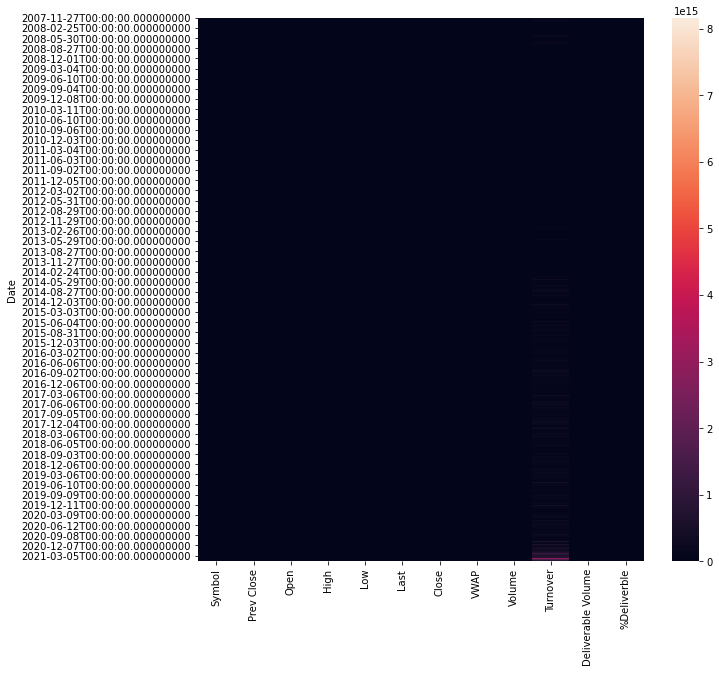

In [13]:
plt.figure(figsize = (10, 10))
sns.heatmap(data)

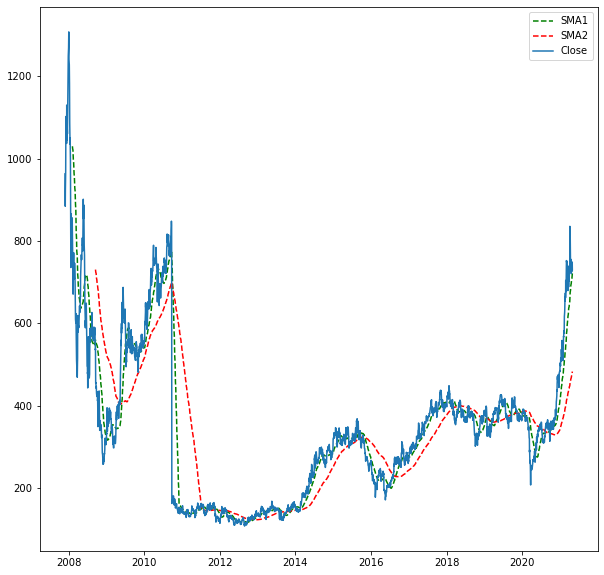

In [24]:
data["SMA1"] = data['Close'].rolling(window = 50).mean()
data["SMA2"] = data['Close'].rolling(window = 200).mean()
plt.figure(figsize = (10,10))
plt.plot(data['SMA1'], 'g--', label = "SMA1")
plt.plot(data['SMA2'], 'r--', label = "SMA2")
plt.plot(data['Close'], label = "Close")
plt.legend()
plt.show()

In [47]:
features = list(data.columns.values)
features

['Symbol',
 'Prev Close',
 'Open',
 'High',
 'Low',
 'Last',
 'Close',
 'VWAP',
 'Volume',
 'Turnover',
 'Deliverable Volume',
 '%Deliverble',
 'SMA1',
 'SMA2']

In [50]:
features.remove('SMA1')
features

['Symbol',
 'Prev Close',
 'Open',
 'High',
 'Low',
 'Last',
 'Close',
 'VWAP',
 'Volume',
 'Turnover',
 'Deliverable Volume',
 '%Deliverble',
 'SMA2']

In [51]:
features.remove('SMA2')
features

['Symbol',
 'Prev Close',
 'Open',
 'High',
 'Low',
 'Last',
 'Close',
 'VWAP',
 'Volume',
 'Turnover',
 'Deliverable Volume',
 '%Deliverble']

In [52]:
features.remove('%Deliverble')
features

['Symbol',
 'Prev Close',
 'Open',
 'High',
 'Low',
 'Last',
 'Close',
 'VWAP',
 'Volume',
 'Turnover',
 'Deliverable Volume']

In [53]:
X = data[features]
y = data['%Deliverble']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [56]:
pred = lr.predict(X_test)
pred

array([ 0.2131468 ,  0.41405488,  0.46343987,  0.5107653 ,  0.48292276,
        0.51530878,  0.41473029,  0.40750116, -0.1837525 ,  0.3175181 ,
        0.48906098,  0.38320945,  0.54899275,  0.49072614,  0.39010764,
        0.34081019,  0.48628605,  0.49023247,  0.52078734,  0.42452321,
        0.33381082,  0.50158001,  0.27683663,  0.3820008 ,  0.42155286,
        0.3006341 ,  0.38438208,  0.40838168,  0.61254146,  0.40290078,
        0.44651461,  0.47952565,  0.46201559,  0.54502559,  0.47415149,
        0.31096314,  0.3853528 ,  0.4847904 ,  0.54518808,  0.40691068,
        0.5614799 ,  0.54630696,  0.33617977,  0.34574689,  0.46103423,
        0.55305913,  0.42533218,  0.45093668,  0.33353967,  0.50493477,
        0.12498915,  0.4010364 ,  0.38115231,  0.43678497,  0.07112644,
        0.53264991,  0.53066198,  0.47160147,  0.46206025,  0.36123463,
        0.60858833,  0.28651296,  0.39586145,  0.51291341,  0.38001472,
        0.43641299,  0.46602356,  0.08824685,  0.37305505,  0.27

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = round(mean_squared_error(y_test, pred), 3)
print("Mean Squared Error =", mse)
mae = round(mean_absolute_error(y_test, pred), 3)
print("Mean Absolute Error =", mae)
print("Root Mean Squared Error =", round(np.sqrt(mse), 3))

Mean Squared Error = 0.014
Mean Absolute Error = 0.087
Root Mean Squared Error = 0.118


(-0.7012160743732436,
 1.143114235005925,
 -0.7012160743732436,
 1.143114235005925)

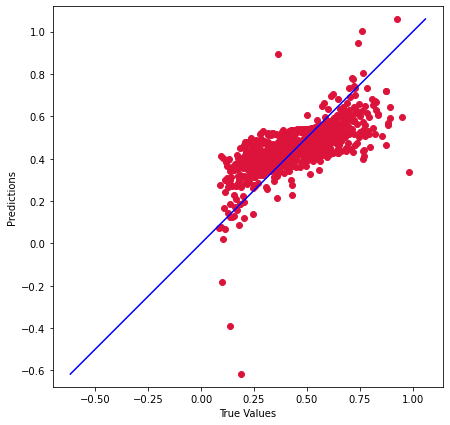

In [65]:
plt.figure(figsize = (7, 7))
plt.scatter(y_test, pred, c = 'crimson')
p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')

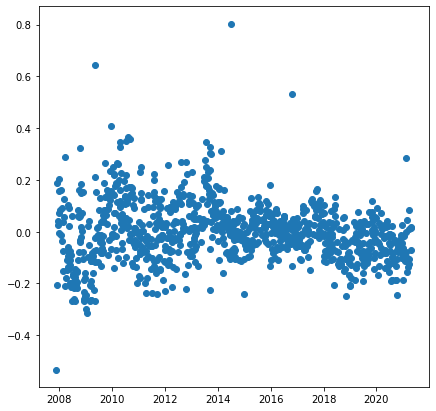

In [66]:
plt.figure(figsize = (7, 7))
plt.plot(y_test - pred, marker = 'o', linestyle = '')

In [61]:
print("Intercept =", lr.intercept_)
print("Coefficient =", lr.coef_)

Intercept = 0.5726497310460519
Coefficient = [-7.01644685e-02  5.26563643e-05  7.08840238e-04  1.69830526e-04
  2.16847639e-03  5.50536841e-03 -4.34501983e-03 -4.47335327e-03
 -7.88497611e-08  7.56275769e-16  1.35145173e-07]


In [64]:
from sklearn.metrics import r2_score
print("R Squared Score =", r2_score(y_test, pred))

R Squared Score = 0.4905298229126249
